
\newpage

1 Considere os seguintes algoritmos evolucionários: Estratégias de evolução, programação genética, evolução diferencial e algoritmos de estimação de distribuição. Implemente cada um dos modelos, para os quais pede-se:

(a) Encontre o ótimo da função Ackley bidimensional.


$$f(x)=-\alpha exp( -b\sqrt{\frac{1}{d} \sum \limits _ {i=1} ^{d}x^2_i }) - exp( \frac{1}{d} \sum \limits _ {i=1} ^{d} \cos(cx_i) ) + a + exp(1)$$ 
$$Onde \ a=20, \ b=0.2, \ c=2\pi, \ x_{i} \in [-32.768; 32.768]$$


(b) Encontre o ótimo da função Griewank bidimensional.


$$f(x)=\sum \limits _ {i=1} ^{d} \frac{x^2 _i}{4000} - \prod \cos( \frac{x_i}{\sqrt{i}}) + 1 $$
$$Onde \ x_i \in [-600, 600]$$


(c) Encontre o ótimo da função Trid de dimensão d=5.


$$f(x) = \sum \limits _{i=1} ^{d} (x_i-1)^2 - \sum \limits _{i=2} ^{d} x_i x_{i-1} $$
$$ Onde \ x_i \in [-d^2, d^2], \ i=1,...,d $$


(d) Encontre o ótimo da função Colville de dimensão d=4


$$f(x)=100(x^2_1 - x_2)^2 + (x_1 - 1)^2 + (x_3 - 1)^2 + 90 (x^2_3 - x_4)^2 + 10.1 ( (x_2 - 1)^2 + (x_4 - 1)^2 ) + 19.8 (x_2 - 1)(x_4 - 1) $$
$$Onde \ x_i \in [-10, 10], \ i=1,...,4$$

\newpage

In [1]:
from utils.de         import DifferentialEvolution
from utils.eda        import CompactGA 
from utils.statistics import Statistics
from functions        import *

import matplotlib.pyplot as plt


# Resolução do Ítem (a)
## Gráfico da Função


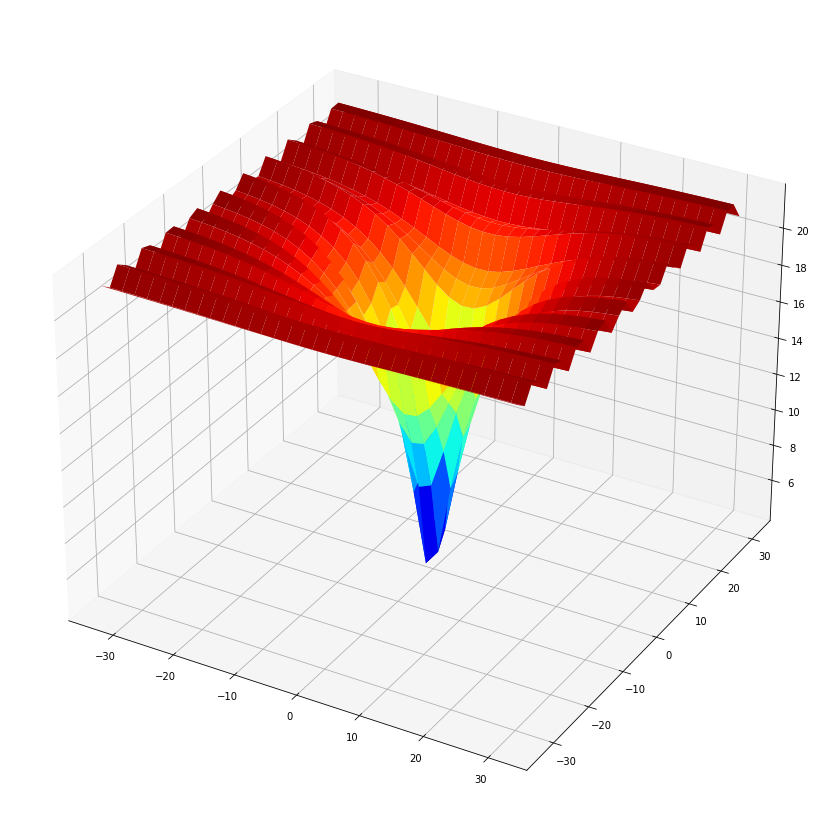

In [2]:
Ackley().graph()

### Evolução Diferencial

In [3]:
all_best_solutions = []
    
de = DifferentialEvolution(
    ng=100,
    np=200,
    cr=0.9, 
    f=0.8, 
    evfunc='Trid', 
    algorithm='best_1_bin'
)
de.evolve()

all_best_solutions = de.get_all_best_solutions()


GERAÇÃO: 100

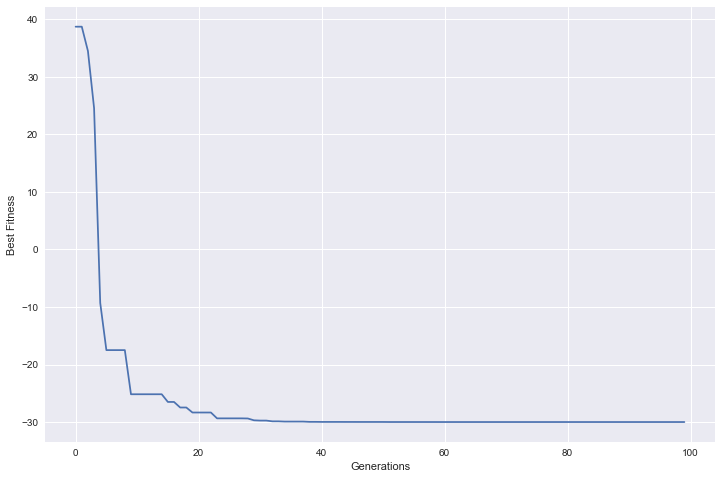

In [4]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [5]:
statistics = Statistics(fitness)

# min_, q1, q2, q3, max_ = statistics.quantile 
# print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.quantile)
print(statistics.mean)


[-29.99999946383818, -29.999975014119826, -29.98794560004255, -29.361958720078093, -29.999995076944828]
-26.197401114856564


In [6]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    de = DifferentialEvolution(
        ng=100,
        np=100,
        cr=0.9, 
        f=0.8, 
        evfunc='Trid', 
        algorithm='best_1_bin'
    )
    de.evolve()

    all_best_solutions.append(de.get_best_solution())
    all_execution_time.append(de.get_execution_time())


GERAÇÃO: 100

In [7]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: -29.999999021308387
Variance: 3.2464149016804423e-13
Standard Deviation: 5.697731918650124e-07


In [8]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 1.7587566375732422
Variance: 0.033289328186594955
Standard Deviation: 0.18245363297724426


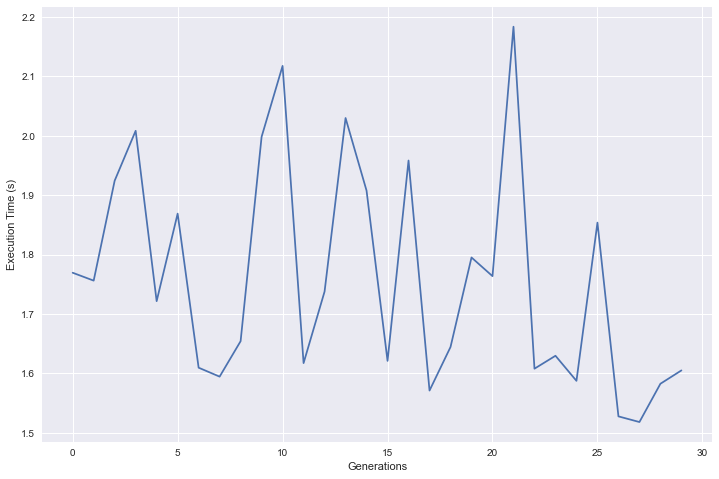

In [9]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()